# The Spark Foundation  - GRIP (Data Science and Business Analytics - JUN'22)

Author - AMAN KUMAR SINGH

Task #1 Prediction Using Supervised ML

Importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the csv dataset using Pandas:

In [2]:
data = pd.read_csv('student_data.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#view the shape of data
data.shape

(25, 2)

In [4]:
#Getting information about data like null values, etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#Getting some basic information about data:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Visualizing the Data

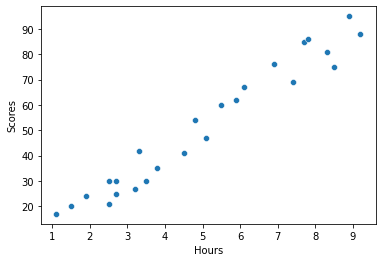

In [6]:
sns.scatterplot(x=data['Hours'], y=data['Scores']);

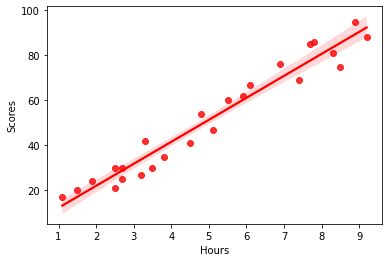

In [7]:
sns.regplot(x=data['Hours'], y=data['Scores'], color='red');

Separate feature(s) and target

In [8]:
x = data[['Hours']]
y = data['Scores']

Spiliting the Train-Test Dataset

In [9]:
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y = train_test_split(x, y, random_state = 0) 

Model Building

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

Train the Model

In [11]:
regressor.fit(train_x, train_y)

LinearRegression()

Prediction

In [12]:
predc_y = regressor.predict(val_x)

Viewing the actual and Predicted value side-by-side

In [13]:
pd.DataFrame({'Actual_value': val_y, 'Predicted_Value': predc_y})

,Actual_value,Predicted_Value
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


Actual Vs Prediction Distribution Plot

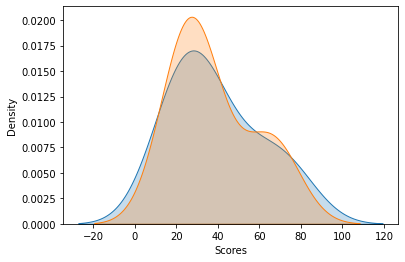

In [14]:
sns.kdeplot(predc_y,label="Predicted_Value", shade=True);
sns.kdeplot(data=val_y, label="Actual_Value", shade=True);

Train and Test Accuracy

In [15]:
print('Train accuracy: ', regressor.score(train_x, train_y),'\nTest accuracy : ', regressor.score(val_x, val_y))

Train accuracy:  0.9484509249326872 
Test accuracy :  0.9367661043365055


Mean Absolute Error

In [16]:
from sklearn import metrics
print('Mean Absolute Error :', metrics.mean_absolute_error(val_y,predc_y))

print('Max Error :',metrics.max_error(val_y,predc_y))

Mean Absolute Error : 4.130879918502486
Max Error : 6.745574939513553


Predicted Score of a Student who studies for 9.25 hr/day

In [17]:
h = [[9.25]]
s = regressor.predict(h)
print('A student who studies for ', h[0][0] , ' hours is estimated to score ', s[0])

A student who studies for  9.25  hours is estimated to score  93.89272889341655


c:\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
